
# Creating matrices for each sub-path according to the move

In [2]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)

path = "data/DB-Output_original.csv"
data = pd.read_csv(path)

data = data.loc[:, ['Initial Solution', 'Moves', 'OFIS', 'OFFS', 'OF_Diff']]
data = data[data.OF_Diff != 0]
#data = data.reset_index(drop=False)

print(data.shape)
data.head(10)

(9248, 5)


,Initial Solution,Moves,OFIS,OFFS,OF_Diff
5,"[['D0', 'C61', 'D0'], ['D0', 'C24', 'C50', 'D0...","['null', 'null', 'ProbabilisticWorstRemovalCus...",30978.64707,26301.09614,4677.550934
21,"[['D0', 'C24', 'D0'], ['D0', 'C26', 'C25', 'D0...","['null', 'null', 'WorstTimeDestroyCustomer', '...",26301.09614,23702.14047,2598.955662
30,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C6', 'C91...","['null', 'null', 'WorstTimeDestroyCustomer', '...",23702.14047,18726.22750,4975.912973
37,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C91', 'C6...","['null', 'null', 'RandomRouteDestroyCustomer',...",18726.22750,17507.99998,1218.227524
40,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C91', 'D0...","['null', 'null', 'TimeBasedDestroyCustomer', '...",17507.99998,17471.76518,36.234795
43,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C91', 'D0...","['null', 'null', 'WorstDistanceDestroyCustomer...",17471.76518,17469.41941,2.345772
46,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C6', 'C24...","['null', 'null', 'WorstDistanceDestroyCustomer...",17469.41941,16251.78228,1217.637127
47,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C24', 'C6...","['null', 'null', 'DemandBasedDestroyCustomer',...",16251.78228,16249.43924,2.343046
49,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C24', 'C6...","['RandomDestroyStation', 'DeterministicBestRep...",16249.43924,16221.64776,27.791482
50,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C24', 'C6...","['null', 'null', 'WorstTimeDestroyCustomer', '...",16221.64776,15005.40910,1216.238655


# List of available and applied moves

From the initial dataframe, a list called 'mv' is created, in which all the different moves applied and shown in the table are included.

In [3]:
mv = data["Moves"]
moves = []
for row in mv:
    for elem in row.split("', '"):
        moves.append(elem)

for i in range(len(moves)):
    moves[i] = moves[i].replace("['","")
    moves[i] = moves[i].replace("']","")

to_remove = "null"
moves = list(filter(lambda x: x != to_remove, moves))

moves=list(set(moves))

print("List of", len(moves), "possible e different moves: \n", moves)

List off 16 possible e different moves: 
 ['GreedyRepairCustomer', 'WorstTimeDestroyCustomer', 'DeterministicBestRepairStation', 'ProximityBasedDestroyCustomer', 'ProbabilisticBestRepairStation', 'ZoneDestroyCustomer', 'RandomDestroyStation', 'GreedyDestroyCustomer', 'WorstDistanceDestroyCustomer', 'GreedyRouteRemoval', 'ShawDestroyCustomer', 'ProbabilisticWorstRemovalCustomer', 'RandomRouteDestroyCustomer', 'LongestWaitingTimeDestroyStation', 'DemandBasedDestroyCustomer', 'TimeBasedDestroyCustomer']


In [4]:
data["Moves"] = data["Moves"].str.replace("[","")
data["Moves"] = data["Moves"].str.replace("]","")
data["Moves"] = data["Moves"].str.replace("'","")
data.head(10)

,Initial Solution,Moves,OFIS,OFFS,OF_Diff
5,"[['D0', 'C61', 'D0'], ['D0', 'C24', 'C50', 'D0...","null, null, ProbabilisticWorstRemovalCustomer,...",30978.64707,26301.09614,4677.550934
21,"[['D0', 'C24', 'D0'], ['D0', 'C26', 'C25', 'D0...","null, null, WorstTimeDestroyCustomer, GreedyRe...",26301.09614,23702.14047,2598.955662
30,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C6', 'C91...","null, null, WorstTimeDestroyCustomer, GreedyRe...",23702.14047,18726.22750,4975.912973
37,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C91', 'C6...","null, null, RandomRouteDestroyCustomer, Greedy...",18726.22750,17507.99998,1218.227524
40,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C91', 'D0...","null, null, TimeBasedDestroyCustomer, GreedyRe...",17507.99998,17471.76518,36.234795
43,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C91', 'D0...","null, null, WorstDistanceDestroyCustomer, Gree...",17471.76518,17469.41941,2.345772
46,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C6', 'C24...","null, null, WorstDistanceDestroyCustomer, Gree...",17469.41941,16251.78228,1217.637127
47,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C24', 'C6...","null, null, DemandBasedDestroyCustomer, Greedy...",16251.78228,16249.43924,2.343046
49,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C24', 'C6...","RandomDestroyStation, DeterministicBestRepairS...",16249.43924,16221.64776,27.791482
50,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C24', 'C6...","null, null, WorstTimeDestroyCustomer, GreedyRe...",16221.64776,15005.40910,1216.238655


In [5]:
user_input = input("Insert one of 16 possible moves: ")
data = data.loc[data['Moves'].str.contains(user_input)]
data

Insert one of 16 possibly moves: RandomDestroyStation


,Initial Solution,Moves,OFIS,OFFS,OF_Diff
49,"[['D0', 'C26', 'C25', 'D0'], ['D0', 'C24', 'C6...","RandomDestroyStation, DeterministicBestRepairS...",16249.439240,16221.647760,27.791482
64,"[['D0', 'C21', 'C25', 'C24', 'D0'], ['D0', 'C5...","RandomDestroyStation, ProbabilisticBestRepairS...",14991.375650,13775.899950,1215.475703
79,"[['D0', 'C81', 'S1', 'C85', 'C90', 'D0'], ['D0...","RandomDestroyStation, ProbabilisticBestRepairS...",11347.289090,11335.314740,11.974343
169,"[['D0', 'C50', 'S11', 'D0'], ['D0', 'C90', 'C9...","RandomDestroyStation, ProbabilisticBestRepairS...",11388.615630,11375.960480,12.655152
199,"[['D0', 'C50', 'D0'], ['D0', 'C90', 'C91', 'C8...","RandomDestroyStation, DeterministicBestRepairS...",10162.383810,10153.083790,9.300018
...,...,...,...,...,...
35215,"[['D0', 'C5', 'C10', 'C11', 'C16', 'C19', 'C18...","RandomDestroyStation, DeterministicBestRepairS...",42453.344550,42085.062130,368.282414
35350,"[['D0', 'C78', 'C67', 'D0'], ['D0', 'C24', 'D0...","RandomDestroyStation, ProbabilisticBestRepairS...",14742.127590,11918.782800,2823.344791
35375,"[['D0', 'C24', 'D0'], ['D0', 'C5', 'C77', 'C78...","RandomDestroyStation, DeterministicBestRepairS...",7297.435520,7297.381645,0.053875
35385,"[['D0', 'C5', 'C2', 'C1', 'C14', 'C25', 'C21',...","RandomDestroyStation, DeterministicBestRepairS...",4844.669310,4843.734853,0.934457


These steps are used to isolate the places contained in the 'Initial Solution' column, so that a matrix can be constructed according to the move being considered

In [6]:
init_sol = data['Initial Solution']
init_sol.head(10)

#path isolation -> all paths of all indices are included in the sol list
sol = []
for row in init_sol:
    for elem in row.split("[' "):
        sol.append(elem)

for i in range(len(sol)):
    sol[i] = sol[i].replace("[['","")
    sol[i] = sol[i].replace("']]","")
    sol[i] = sol[i].replace("'","")
    sol[i] = sol[i].replace(",","")
    sol[i] = sol[i].replace("[","")    
    
for i in range(len(sol)):
    sol[i] = sol[i].split('] ')

In [7]:
data["Initial Solution"] = data["Initial Solution"].str.replace("[","")
data["Initial Solution"] = data["Initial Solution"].str.replace("]","")
data["Initial Solution"] = data["Initial Solution"].str.replace(",","")
data["Initial Solution"] = data["Initial Solution"].str.replace("'","")

init_sol = data["Initial Solution"]

places = []
for row in init_sol:
    for elem in row.split():
        places.append(elem)

places = np.array(places)
distinct_places = np.unique(places)

print(distinct_places)
print(len(distinct_places))


['C1' 'C10' 'C100' 'C11' 'C12' 'C13' 'C14' 'C15' 'C16' 'C17' 'C18' 'C19'
 'C2' 'C20' 'C21' 'C22' 'C23' 'C24' 'C25' 'C26' 'C27' 'C28' 'C29' 'C3'
 'C30' 'C31' 'C32' 'C33' 'C34' 'C35' 'C36' 'C37' 'C38' 'C39' 'C4' 'C40'
 'C41' 'C42' 'C43' 'C44' 'C45' 'C46' 'C47' 'C48' 'C49' 'C5' 'C50' 'C51'
 'C52' 'C53' 'C54' 'C55' 'C56' 'C57' 'C58' 'C59' 'C6' 'C60' 'C61' 'C62'
 'C63' 'C64' 'C65' 'C66' 'C67' 'C68' 'C69' 'C7' 'C70' 'C71' 'C72' 'C73'
 'C74' 'C75' 'C76' 'C77' 'C78' 'C79' 'C8' 'C80' 'C81' 'C82' 'C83' 'C84'
 'C85' 'C86' 'C87' 'C88' 'C89' 'C9' 'C90' 'C91' 'C92' 'C93' 'C94' 'C95'
 'C96' 'C97' 'C98' 'C99' 'D0' 'S0' 'S1' 'S10' 'S11' 'S12' 'S13' 'S14'
 'S15' 'S16' 'S17' 'S18' 'S19' 'S2' 'S20' 'S3' 'S4' 'S5' 'S7' 'S9']
120


In [8]:
# empty list
lista_principale = [] # contains n elements, each element contains n dataframes related to the n-th index

for index_ext, value_ext in enumerate(sol):
    
    lista_dataframe = []
    for index_int, value_int in enumerate(value_ext):

        #print(type(value_ext, value_int))
        zeros = np.zeros([len(distinct_places), len(distinct_places)])
        df = pd.DataFrame(zeros, index=distinct_places, columns=distinct_places)

        temp_string = value_int

        split = temp_string.split(" ")
        split = np.array(split)

        for i in range(len(split)-1):

            df.loc[split[i], split[i+1]] = 1

        lista_dataframe.append(df)

    # sum of the resulting dataframes into a single dataframe
    df_sum = lista_dataframe[0]
    for i in range (1, len(lista_dataframe)):
        df_sum = df_sum.add(lista_dataframe[i])

    # insert the sum dataframe in the main list
    lista_principale.append(df_sum)

X = np.array([df.to_numpy() for df in lista_principale])
X[:2]

In [ ]:
#my_list = [pd.DataFrame(np.random.randint(10, size=(120, 120))) for _ in range(800)]
#out = np.array([df.to_numpy() for df in my_list])

In [12]:
improvement = pd.Series()
data['Improvement'] = improvement

label = pd.Series()
data['Label'] = label

conditions = [
    (data['OF_Diff'] < 0), #negative
    (data['OF_Diff'] >= 0) & (data['OF_Diff'] < 2), #zero
    (data['OF_Diff'] >= 2) & (data['OF_Diff'] < 10), #little
    (data['OF_Diff'] >= 10) & (data['OF_Diff'] < 60), #medium
    (data['OF_Diff'] >= 60) #a lot
]

classi = ["Negative", "Zero", "Little", "Medium", "Lot"]
label = [0, 1, 2, 3, 4]

data['Improvement'] = np.select(conditions, classi)
data["Label"] = np.select(conditions, label)

data.head()

,Initial Solution,Moves,OFIS,OFFS,OF_Diff,Improvement,Label
49,D0 C26 C25 D0 D0 C24 C6 D0 D0 C91 D0 D0 C50 D0...,"RandomDestroyStation, DeterministicBestRepairS...",16249.43924,16221.64776,27.791482,Medium,3
64,D0 C21 C25 C24 D0 D0 C50 D0 D0 C81 S1 C85 C90 ...,"RandomDestroyStation, ProbabilisticBestRepairS...",14991.37565,13775.89995,1215.475703,Lot,4
79,D0 C81 S1 C85 C90 D0 D0 C18 C15 C16 S7 D0 D0 C...,"RandomDestroyStation, ProbabilisticBestRepairS...",11347.28909,11335.31474,11.974343,Medium,3
169,D0 C50 S11 D0 D0 C90 C91 C82 S20 C81 D0 D0 C18...,"RandomDestroyStation, ProbabilisticBestRepairS...",11388.61563,11375.96048,12.655152,Medium,3
199,D0 C50 D0 D0 C90 C91 C82 S20 C81 D0 D0 C18 C15...,"RandomDestroyStation, DeterministicBestRepairS...",10162.38381,10153.08379,9.300018,Little,2


To recap, starting with the choice of a move (from the 16 available), all iterations of the algorithm that apply the move in question are taken.

Adjacency matrices are then generated for each sub-path in which the chosen move is applied, and summed up all the matrices into a single resultant per iteration.

At the end, in 'main_list', a list containing the resulting adjacency matrices from all iterations is obtained.

# Example notebook iteration

- take the main dataframe

- one of 16 possible moves is chosen (e.g. 'ShawDestroyCustomer', 'ProximityBasedDestroyCustomer', 'GreedyRouteRemoval'...)

- the original dataframe is reduced to just the interactions where the chosen move was applied

- for each row of the dataframe we have an iteration comprising several sub-paths

- an adjacency (sub)matrix is generated for each sub-path (so we have n matrices per row)

- each (sub)matrix is summed into a single resulting matrix (so one per row)

- the resulting adjacency matrices relating to a specific move are placed in a list.

# Creation of the CNN

In [13]:
y = data["Label"].values
X.shape, y.shape

((477, 120, 120), (477,))

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42)

x_test.shape, y_train.shape

((96, 120, 120), (381,))

In [15]:
from keras.utils import to_categorical

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([1., 0., 0., 0., 0.], dtype=float32)

Esperimento con L1=4, L2=8, LD=4, epochs=10
Epoch 1/10
12/12 [==============================] - 6s 495ms/step - loss: 1.5715 - accuracy: 0.2362 - val_loss: 1.5362 - val_accuracy: 0.3229
Epoch 2/10
12/12 [==============================] - 7s 559ms/step - loss: 1.5435 - accuracy: 0.2966 - val_loss: 1.5325 - val_accuracy: 0.3229
Epoch 3/10
12/12 [==============================] - 6s 533ms/step - loss: 1.5405 - accuracy: 0.2966 - val_loss: 1.5294 - val_accuracy: 0.3229
Epoch 4/10
12/12 [==============================] - 7s 592ms/step - loss: 1.5381 - accuracy: 0.2966 - val_loss: 1.5262 - val_accuracy: 0.3229
Epoch 5/10
12/12 [==============================] - 6s 490ms/step - loss: 1.5359 - accuracy: 0.2966 - val_loss: 1.5228 - val_accuracy: 0.3229
Epoch 6/10
12/12 [==============================] - 4s 303ms/step - loss: 1.5333 - accuracy: 0.2966 - val_loss: 1.5204 - val_accuracy: 0.3229
Epoch 7/10
12/12 [==============================] - 4s 306ms/step - loss: 1.5316 - accuracy: 0.2966 - va

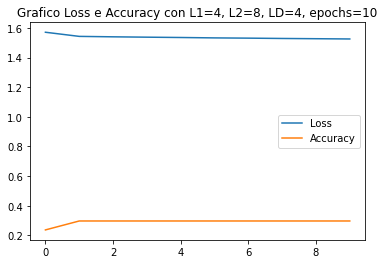

Esperimento con L1=4, L2=8, LD=8, epochs=10
Epoch 1/10
12/12 [==============================] - 4s 317ms/step - loss: 1.5424 - accuracy: 0.2441 - val_loss: 1.5129 - val_accuracy: 0.1562
Epoch 2/10
12/12 [==============================] - 4s 308ms/step - loss: 1.5153 - accuracy: 0.2913 - val_loss: 1.5115 - val_accuracy: 0.3229
Epoch 3/10
12/12 [==============================] - 4s 306ms/step - loss: 1.5066 - accuracy: 0.2966 - val_loss: 1.5097 - val_accuracy: 0.3229
Epoch 4/10
12/12 [==============================] - 4s 310ms/step - loss: 1.4954 - accuracy: 0.2966 - val_loss: 1.5136 - val_accuracy: 0.3229
Epoch 5/10
12/12 [==============================] - 4s 313ms/step - loss: 1.4822 - accuracy: 0.3491 - val_loss: 1.5130 - val_accuracy: 0.3125
Epoch 6/10
12/12 [==============================] - 4s 307ms/step - loss: 1.4682 - accuracy: 0.4593 - val_loss: 1.5117 - val_accuracy: 0.3125
Epoch 7/10
12/12 [==============================] - 4s 310ms/step - loss: 1.4554 - accuracy: 0.4698 - va

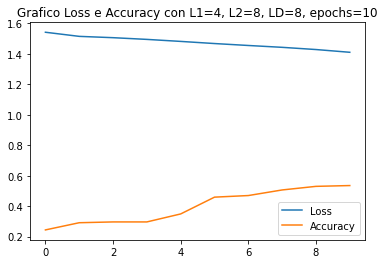

Esperimento con L1=4, L2=16, LD=4, epochs=10
Epoch 1/10
12/12 [==============================] - 5s 361ms/step - loss: 1.5698 - accuracy: 0.2520 - val_loss: 1.4931 - val_accuracy: 0.3229
Epoch 2/10
12/12 [==============================] - 4s 339ms/step - loss: 1.4823 - accuracy: 0.3780 - val_loss: 1.5231 - val_accuracy: 0.3125
Epoch 3/10
12/12 [==============================] - 4s 343ms/step - loss: 1.4123 - accuracy: 0.4777 - val_loss: 1.5130 - val_accuracy: 0.2917
Epoch 4/10
12/12 [==============================] - 4s 342ms/step - loss: 1.3546 - accuracy: 0.4961 - val_loss: 1.5405 - val_accuracy: 0.3021
Epoch 5/10
12/12 [==============================] - 4s 341ms/step - loss: 1.3155 - accuracy: 0.5249 - val_loss: 1.5366 - val_accuracy: 0.3542
Epoch 6/10
12/12 [==============================] - 4s 342ms/step - loss: 1.2865 - accuracy: 0.5249 - val_loss: 1.5486 - val_accuracy: 0.3125
Epoch 7/10
12/12 [==============================] - 5s 423ms/step - loss: 1.2592 - accuracy: 0.5302 - v

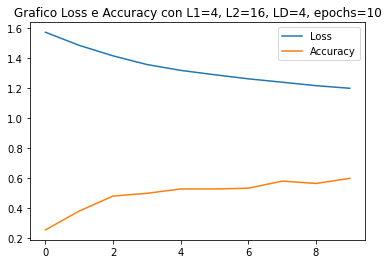

Esperimento con L1=4, L2=16, LD=8, epochs=10
Epoch 1/10
12/12 [==============================] - 5s 359ms/step - loss: 1.5463 - accuracy: 0.2677 - val_loss: 1.4807 - val_accuracy: 0.3125
Epoch 2/10
12/12 [==============================] - 4s 340ms/step - loss: 1.5127 - accuracy: 0.2598 - val_loss: 1.4816 - val_accuracy: 0.2708
Epoch 3/10
12/12 [==============================] - 4s 343ms/step - loss: 1.4654 - accuracy: 0.3780 - val_loss: 1.4695 - val_accuracy: 0.2708
Epoch 4/10
12/12 [==============================] - 4s 344ms/step - loss: 1.4336 - accuracy: 0.4147 - val_loss: 1.4738 - val_accuracy: 0.2812
Epoch 5/10
12/12 [==============================] - 4s 345ms/step - loss: 1.4120 - accuracy: 0.4593 - val_loss: 1.4824 - val_accuracy: 0.3229
Epoch 6/10
12/12 [==============================] - 4s 347ms/step - loss: 1.3919 - accuracy: 0.4619 - val_loss: 1.4769 - val_accuracy: 0.3021
Epoch 7/10
12/12 [==============================] - 4s 346ms/step - loss: 1.3713 - accuracy: 0.4777 - v

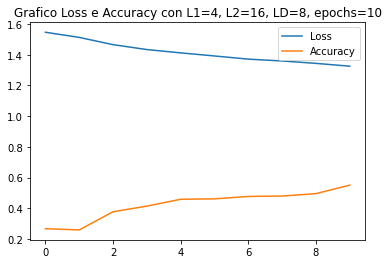

Esperimento con L1=8, L2=8, LD=4, epochs=10
Epoch 1/10
12/12 [==============================] - 5s 359ms/step - loss: 1.5537 - accuracy: 0.2651 - val_loss: 1.5283 - val_accuracy: 0.3333
Epoch 2/10
12/12 [==============================] - 4s 346ms/step - loss: 1.4583 - accuracy: 0.4121 - val_loss: 1.5254 - val_accuracy: 0.3125
Epoch 3/10
12/12 [==============================] - 4s 346ms/step - loss: 1.3823 - accuracy: 0.4751 - val_loss: 1.5050 - val_accuracy: 0.3021
Epoch 4/10
12/12 [==============================] - 4s 347ms/step - loss: 1.3103 - accuracy: 0.4934 - val_loss: 1.5431 - val_accuracy: 0.2812
Epoch 5/10
12/12 [==============================] - 4s 345ms/step - loss: 1.2620 - accuracy: 0.4908 - val_loss: 1.5266 - val_accuracy: 0.2812
Epoch 6/10
12/12 [==============================] - 4s 343ms/step - loss: 1.2231 - accuracy: 0.4934 - val_loss: 1.5235 - val_accuracy: 0.2812
Epoch 7/10
12/12 [==============================] - 4s 345ms/step - loss: 1.2014 - accuracy: 0.5092 - va

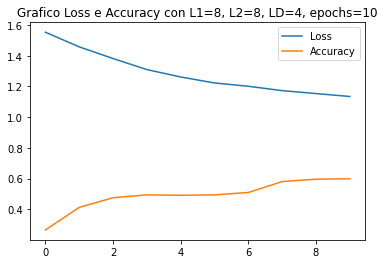

Esperimento con L1=8, L2=8, LD=8, epochs=10
Epoch 1/10
12/12 [==============================] - 5s 364ms/step - loss: 1.5596 - accuracy: 0.2992 - val_loss: 1.5191 - val_accuracy: 0.3646
Epoch 2/10
12/12 [==============================] - 4s 347ms/step - loss: 1.5029 - accuracy: 0.3622 - val_loss: 1.5032 - val_accuracy: 0.3750
Epoch 3/10
12/12 [==============================] - 4s 346ms/step - loss: 1.4690 - accuracy: 0.3937 - val_loss: 1.5029 - val_accuracy: 0.3542
Epoch 4/10
12/12 [==============================] - 4s 346ms/step - loss: 1.4266 - accuracy: 0.4436 - val_loss: 1.5000 - val_accuracy: 0.3854
Epoch 5/10
12/12 [==============================] - 4s 346ms/step - loss: 1.3817 - accuracy: 0.5092 - val_loss: 1.5057 - val_accuracy: 0.3750
Epoch 6/10
12/12 [==============================] - 4s 350ms/step - loss: 1.3364 - accuracy: 0.5879 - val_loss: 1.4974 - val_accuracy: 0.4062
Epoch 7/10
12/12 [==============================] - 4s 349ms/step - loss: 1.2959 - accuracy: 0.6430 - va

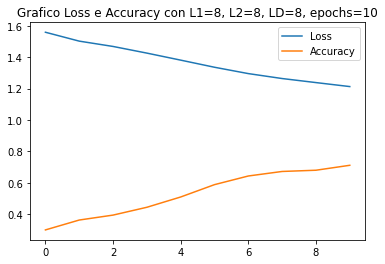

Esperimento con L1=8, L2=16, LD=4, epochs=10
Epoch 1/10
12/12 [==============================] - 5s 409ms/step - loss: 1.5729 - accuracy: 0.2677 - val_loss: 1.5378 - val_accuracy: 0.2708
Epoch 2/10
12/12 [==============================] - 5s 393ms/step - loss: 1.4780 - accuracy: 0.5459 - val_loss: 1.5364 - val_accuracy: 0.2812
Epoch 3/10
12/12 [==============================] - 5s 389ms/step - loss: 1.4013 - accuracy: 0.6220 - val_loss: 1.5362 - val_accuracy: 0.3021
Epoch 4/10
12/12 [==============================] - 5s 388ms/step - loss: 1.3358 - accuracy: 0.6798 - val_loss: 1.5394 - val_accuracy: 0.2708
Epoch 5/10
12/12 [==============================] - 5s 391ms/step - loss: 1.2784 - accuracy: 0.7270 - val_loss: 1.5463 - val_accuracy: 0.2917
Epoch 6/10
12/12 [==============================] - 5s 389ms/step - loss: 1.2372 - accuracy: 0.7585 - val_loss: 1.5438 - val_accuracy: 0.2812
Epoch 7/10
12/12 [==============================] - 5s 388ms/step - loss: 1.2117 - accuracy: 0.7533 - v

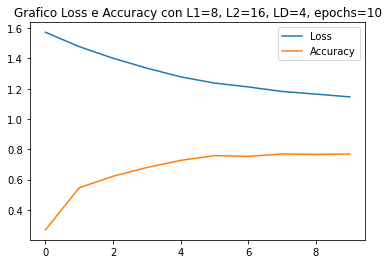

Esperimento con L1=8, L2=16, LD=8, epochs=10
Epoch 1/10
12/12 [==============================] - 5s 403ms/step - loss: 1.5476 - accuracy: 0.2966 - val_loss: 1.5186 - val_accuracy: 0.3125
Epoch 2/10
12/12 [==============================] - 5s 389ms/step - loss: 1.4885 - accuracy: 0.3333 - val_loss: 1.5244 - val_accuracy: 0.3958
Epoch 3/10
12/12 [==============================] - 5s 393ms/step - loss: 1.4054 - accuracy: 0.4514 - val_loss: 1.5165 - val_accuracy: 0.3438
Epoch 4/10
12/12 [==============================] - 5s 390ms/step - loss: 1.3361 - accuracy: 0.5459 - val_loss: 1.5463 - val_accuracy: 0.3333
Epoch 5/10
12/12 [==============================] - 5s 390ms/step - loss: 1.2716 - accuracy: 0.6010 - val_loss: 1.5461 - val_accuracy: 0.3333
Epoch 6/10
12/12 [==============================] - 5s 389ms/step - loss: 1.2295 - accuracy: 0.6378 - val_loss: 1.5335 - val_accuracy: 0.3438
Epoch 7/10
12/12 [==============================] - 5s 390ms/step - loss: 1.2047 - accuracy: 0.6378 - v

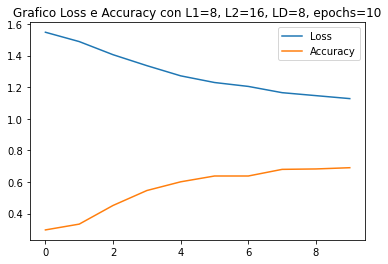

Esperimento con L1=16, L2=8, LD=4, epochs=10
Epoch 1/10
12/12 [==============================] - 9s 712ms/step - loss: 1.5332 - accuracy: 0.2310 - val_loss: 1.5371 - val_accuracy: 0.3021
Epoch 2/10
12/12 [==============================] - 6s 501ms/step - loss: 1.4933 - accuracy: 0.3150 - val_loss: 1.5329 - val_accuracy: 0.2188
Epoch 3/10
12/12 [==============================] - 6s 501ms/step - loss: 1.4312 - accuracy: 0.4331 - val_loss: 1.5185 - val_accuracy: 0.2500
Epoch 4/10
12/12 [==============================] - 6s 502ms/step - loss: 1.3772 - accuracy: 0.4908 - val_loss: 1.5115 - val_accuracy: 0.2604
Epoch 5/10
12/12 [==============================] - 6s 497ms/step - loss: 1.3343 - accuracy: 0.5144 - val_loss: 1.5322 - val_accuracy: 0.2292
Epoch 6/10
12/12 [==============================] - 6s 498ms/step - loss: 1.3146 - accuracy: 0.5092 - val_loss: 1.5206 - val_accuracy: 0.2188
Epoch 7/10
12/12 [==============================] - 6s 505ms/step - loss: 1.3016 - accuracy: 0.5039 - v

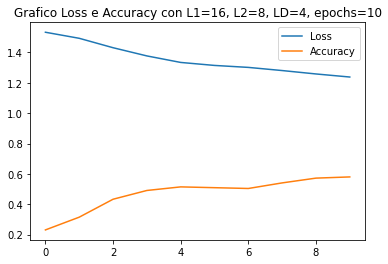

Esperimento con L1=16, L2=8, LD=8, epochs=10
Epoch 1/10
12/12 [==============================] - 7s 561ms/step - loss: 1.5370 - accuracy: 0.2205 - val_loss: 1.5107 - val_accuracy: 0.2500
Epoch 2/10
12/12 [==============================] - 6s 497ms/step - loss: 1.4780 - accuracy: 0.3045 - val_loss: 1.5151 - val_accuracy: 0.2604
Epoch 3/10
12/12 [==============================] - 6s 498ms/step - loss: 1.4352 - accuracy: 0.3832 - val_loss: 1.4877 - val_accuracy: 0.2708
Epoch 4/10
12/12 [==============================] - 6s 493ms/step - loss: 1.3831 - accuracy: 0.4777 - val_loss: 1.4934 - val_accuracy: 0.2083
Epoch 5/10
12/12 [==============================] - 6s 493ms/step - loss: 1.3410 - accuracy: 0.5381 - val_loss: 1.4720 - val_accuracy: 0.2604
Epoch 6/10
12/12 [==============================] - 6s 492ms/step - loss: 1.3130 - accuracy: 0.5906 - val_loss: 1.4642 - val_accuracy: 0.2396
Epoch 7/10
12/12 [==============================] - 6s 492ms/step - loss: 1.2998 - accuracy: 0.5276 - v

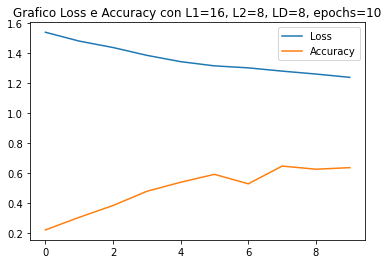

Esperimento con L1=16, L2=16, LD=4, epochs=10
Epoch 1/10
12/12 [==============================] - 7s 575ms/step - loss: 1.5283 - accuracy: 0.2808 - val_loss: 1.4838 - val_accuracy: 0.3125
Epoch 2/10
12/12 [==============================] - 7s 553ms/step - loss: 1.5133 - accuracy: 0.2730 - val_loss: 1.4828 - val_accuracy: 0.3125
Epoch 3/10
12/12 [==============================] - 7s 555ms/step - loss: 1.5125 - accuracy: 0.2730 - val_loss: 1.4816 - val_accuracy: 0.3125
Epoch 4/10
12/12 [==============================] - 7s 552ms/step - loss: 1.5111 - accuracy: 0.2730 - val_loss: 1.4807 - val_accuracy: 0.3125
Epoch 5/10
12/12 [==============================] - 7s 621ms/step - loss: 1.5102 - accuracy: 0.2730 - val_loss: 1.4803 - val_accuracy: 0.3125
Epoch 6/10
12/12 [==============================] - 7s 587ms/step - loss: 1.5095 - accuracy: 0.2730 - val_loss: 1.4798 - val_accuracy: 0.3125
Epoch 7/10
12/12 [==============================] - 7s 555ms/step - loss: 1.5088 - accuracy: 0.2730 - 

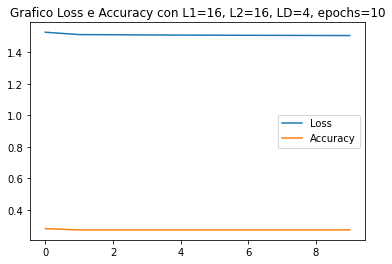

Esperimento con L1=16, L2=16, LD=8, epochs=10
Epoch 1/10
12/12 [==============================] - 7s 577ms/step - loss: 1.5771 - accuracy: 0.2257 - val_loss: 1.5573 - val_accuracy: 0.2083
Epoch 2/10
12/12 [==============================] - 7s 552ms/step - loss: 1.4633 - accuracy: 0.3911 - val_loss: 1.5663 - val_accuracy: 0.1771
Epoch 3/10
12/12 [==============================] - 7s 556ms/step - loss: 1.3786 - accuracy: 0.5249 - val_loss: 1.5780 - val_accuracy: 0.2396
Epoch 4/10
12/12 [==============================] - 7s 553ms/step - loss: 1.3139 - accuracy: 0.5958 - val_loss: 1.5533 - val_accuracy: 0.2708
Epoch 5/10
12/12 [==============================] - 7s 555ms/step - loss: 1.2500 - accuracy: 0.6404 - val_loss: 1.5449 - val_accuracy: 0.3542
Epoch 6/10
12/12 [==============================] - 7s 556ms/step - loss: 1.2079 - accuracy: 0.6562 - val_loss: 1.5775 - val_accuracy: 0.3229
Epoch 7/10
12/12 [==============================] - 7s 553ms/step - loss: 1.1803 - accuracy: 0.6693 - 

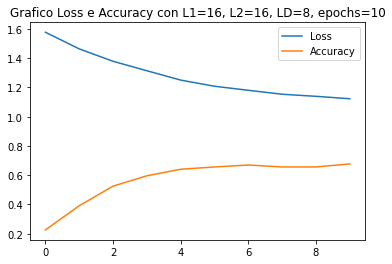

In [29]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

layer1 = [4, 8, 16]
layer2 = [8, 16]
layerDense = [4, 8]
epochs = [10]

for l1 in layer1:
    for l2 in layer2:
        for ld in layerDense:
            for e in epochs:
                
                print("Esperimento con L1="+str(l1)+ ", L2="+str(l2)+ ", LD="+str(ld)+", epochs="+str(e))
                #create model
                model = Sequential()

                #add model layers

                model.add(Conv2D(l1, kernel_size=(3,3), activation='relu', input_shape=(120,120,1), padding='same'))
                model.add(Conv2D(l2, kernel_size=(3,3), activation='relu', padding='same'))

                model.add(Flatten())

                model.add(Dense(ld, activation='softmax'))

                model.add(Dense(5, activation='softmax'))
                
                model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
                prova = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=e, batch_size=32)

                loss = prova.history['loss']
                accuracy = prova.history['accuracy']
                
                fig = plt.figure() # crea una figura
                ax = fig.add_subplot(111) # crea un sottografico con 1 riga e 1 colonna

                # plotta i dati loss e accuracy
                ax.plot(loss, label='Loss')
                ax.plot(accuracy, label='Accuracy')

                plt.title("Grafico Loss e Accuracy con L1="+str(l1)+ ", L2="+str(l2)+ ", LD="+str(ld)+", epochs="+str(e))
                plt.legend()
                
                my_plot = plt # salva il grafico in una variabile e in un file png
                plt.savefig("grafici/plot_{}.png".format(""+str(l1)+"_"+str(l2)+"_"+str(ld)))
                plt.show()
